In [1]:
import numpy as np
import pandas as pd
import re
import warnings
import pymongo
from pymongo import MongoClient

In [2]:
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["brexit"]
tweets = mydb["brexit"]

In [5]:
cursor=tweets.aggregate([
  {"$group":{"_id": "$lang", "count": {"$sum": 1}}},
  {"$sort":{"count": -1}},
  { "$limit": 10 }
])
#print(list(cursor))

Text(0.5,0,'Language')

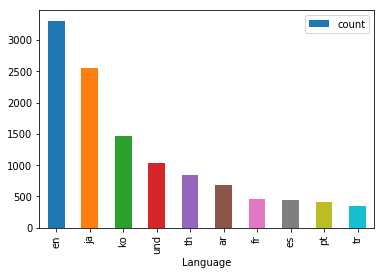

In [6]:
#1.Top 10 languages used by Twitter users for topic related to “trump”
import matplotlib.pyplot as plt
dfr=pd.DataFrame.from_records(cursor)
plot1=dfr.plot(x="_id", y="count", kind="bar")
plot1.xaxis.set_label_text("Language")

In [7]:
#2.Top 10 hashtags used by Twitter users for topic related to “trump”
cursor1=tweets.aggregate([ 
{"$unwind": "$entities.hashtags"}, 
{ "$group": { 
"_id": "$entities.hashtags.text", 
"tagCount": {"$sum": 1} 
}}, 
{ "$sort": { 
"tagCount": -1 
}}, 
{ "$limit": 10 }
])
#print(list(cursor1))

In [8]:
dfr2=pd.DataFrame.from_records(cursor1)
dfr2

,_id,tagCount
0,BTS,384
1,오늘의방탄,242
2,방탄소년단,236
3,나고야2회차공연,235
4,WayV,174
5,WeiShenV,169
6,威神V,165
7,JIMIN,113
8,지민,92
9,TEN,85


In [9]:
#3.Top 10 user countries with the greatest number of followers
cursor2=tweets.aggregate([
    {"$group":{"_id": "$place.country", "total_followers":{"$sum":"$user.followers_count"}}},
    {"$sort":{"total_followers": -1}},
    { "$limit": 11 }
])
#print(list(cursor2))

In [10]:
dfr1=pd.DataFrame.from_records(cursor2)
dfr1n = dfr1.iloc[1:]
dfr1n

,_id,total_followers
1,Ecuador,120015
2,Ελλάς,70331
3,United Kingdom,43894
4,France,19306
5,Australia,11916
6,Brasil,10001
7,Turkey,8828
8,España,7015
9,United States,5879
10,日本,4224


Text(0.5,0,'Name_User Country')

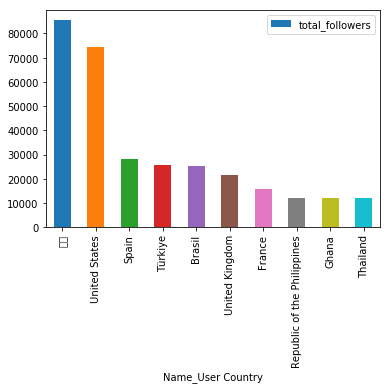

In [9]:
plot2=dfr1n.plot(x="_id", y="total_followers", kind="bar")
plot2.xaxis.set_label_text("Name_User Country")

In [10]:
#4.Top 10 users with the greatest number of retweets
cursor3=tweets.aggregate([
    {"$group":{"_id": "$retweeted_status.user.name", "total_retweets":{"$sum":"$retweeted_status.retweet_count"}}},
    {"$sort":{"total_retweets": -1}},
    { "$limit": 10 }])
print(list(cursor3))

[{'_id': '방탄소년단', 'total_retweets': 11470247}, {'_id': 'スターライトステージ', 'total_retweets': 5144690}, {'_id': 'c', 'total_retweets': 2976406}, {'_id': 'Jordan Ireland', 'total_retweets': 1851077}, {'_id': 'David Tra', 'total_retweets': 1530645}, {'_id': 'juany', 'total_retweets': 1400217}, {'_id': 'Maria Fernanda', 'total_retweets': 997301}, {'_id': 'BTS_official', 'total_retweets': 959946}, {'_id': 'Aquiles', 'total_retweets': 953754}, {'_id': 'BamBam', 'total_retweets': 895634}]
